In [1]:
# 2.5 - search of text corpus with result ordering by word frequency
#
# code for the Intuitive Text Mining book
# Tariq Rashid, 2018

In [2]:
# collections for counter
import collections

# pandas for dataframes
import pandas

# glob module for finding files that match a pattern, os module for file basename
import glob
import os

In [3]:
# function to clean and simplify text for indexing and also querying

def clean_text(text):
    
    # make lowercase
    cleaned_text = text.lower()

    # keep only normal letters a-z, numbers, spaces, and new lines, remove punctuation
    cleaned_text = [char for char in cleaned_text if char.isalnum() or char==" " or char=='\n']
    cleaned_text = "".join(cleaned_text)
    
    return cleaned_text

In [4]:
# read text documents and build occurrence matrix

# corpus location and text filename pattern
corpus_directory = 'data_sets/recipes/'
text_filename_pattern = 'txt/??.txt'

# list of text files
list_of_text_files = glob.glob(corpus_directory + text_filename_pattern)

# create dataframe_list
dataframe_list = []

# read text from every text file
for document_file_path in list_of_text_files:
    document_name = os.path.basename(document_file_path)
    print("reading from ...", document_name)
    with open(document_file_path, "r") as f:
        
        # read text content of file
        text_content = f.read()
        
        # clean text content
        cleaned_text = clean_text(text_content)

        # split the text into words
        word_list = cleaned_text.split()
        
        # count words
        words_ctr = collections.Counter(word_list)
        
        # create word occurrence column and add to list
        dataframe_list.append( pandas.DataFrame.from_dict(words_ctr, orient='index', columns=[document_name]) )
        
        pass
    pass

# join together the per-doc dataframes
occurrence_matrix = pandas.concat(dataframe_list, axis=1, sort=False)

# replace empty cells with 0
occurrence_matrix.fillna(0, inplace=True)

# change number type from float to integer
occurrence_matrix = occurrence_matrix.astype(int)

reading from ... 15.txt
reading from ... 01.txt
reading from ... 00.txt
reading from ... 14.txt
reading from ... 02.txt
reading from ... 16.txt
reading from ... 17.txt
reading from ... 03.txt
reading from ... 07.txt
reading from ... 13.txt
reading from ... 12.txt
reading from ... 06.txt
reading from ... 10.txt
reading from ... 04.txt
reading from ... 05.txt
reading from ... 11.txt
reading from ... 08.txt
reading from ... 20.txt
reading from ... 21.txt
reading from ... 09.txt
reading from ... 19.txt
reading from ... 18.txt


In [5]:
# display part of word occurrence matrix
occurrence_matrix.head()

,15.txt,01.txt,00.txt,14.txt,02.txt,16.txt,17.txt,03.txt,07.txt,13.txt,...,10.txt,04.txt,05.txt,11.txt,08.txt,20.txt,21.txt,09.txt,19.txt,18.txt
fried,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
eggplants,2,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
melanzane,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
fritte,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
eggplant,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# sums of occurrence columns is the doc word length

occurrence_matrix.sum()

15.txt     82
01.txt    127
00.txt     84
14.txt    109
02.txt    103
16.txt    112
17.txt    205
03.txt    262
07.txt    195
13.txt    139
12.txt    180
06.txt     90
10.txt    107
04.txt    285
05.txt     94
11.txt    182
08.txt    223
20.txt     88
21.txt    147
09.txt     96
19.txt    192
18.txt     94
dtype: int64

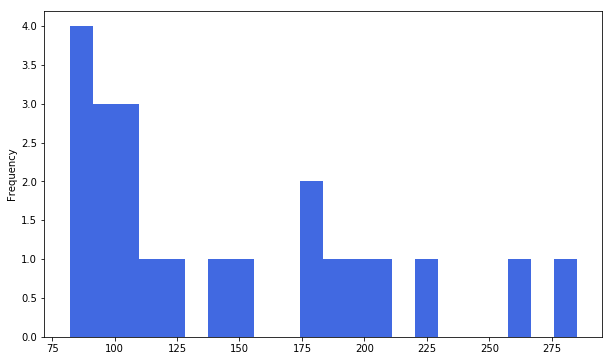

In [81]:
# visualise size of docs

#occurrence_matrix.sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,6), color='royalblue')

occurrence_matrix.sum().sort_values(ascending=False).plot(kind='hist', bins=len(occurrence_matrix.columns), figsize=(10,6), color='royalblue')

In [82]:
# frequency matrix is occurrence matrix columns divided by column sums

frequency_matrix = occurrence_matrix/occurrence_matrix.sum()
frequency_matrix.head()

,15.txt,01.txt,00.txt,14.txt,02.txt,16.txt,17.txt,03.txt,07.txt,13.txt,...,10.txt,04.txt,05.txt,11.txt,08.txt,20.txt,21.txt,09.txt,19.txt,18.txt
fried,0.012195,0.0,0.0,0.009174,0.0,0.000000,0.0,0.0,0.005128,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eggplants,0.024390,0.0,0.0,0.000000,0.0,0.017857,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
melanzane,0.012195,0.0,0.0,0.000000,0.0,0.008929,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
fritte,0.012195,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
eggplant,0.012195,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# frequencies should add up to 1.0

frequency_matrix.sum()

15.txt    1.0
01.txt    1.0
00.txt    1.0
14.txt    1.0
02.txt    1.0
16.txt    1.0
17.txt    1.0
03.txt    1.0
07.txt    1.0
13.txt    1.0
12.txt    1.0
06.txt    1.0
10.txt    1.0
04.txt    1.0
05.txt    1.0
11.txt    1.0
08.txt    1.0
20.txt    1.0
21.txt    1.0
09.txt    1.0
19.txt    1.0
18.txt    1.0
dtype: float64

In [10]:
# do search, results sorted by occurrence

results = frequency_matrix.loc["burn"].sort_values(ascending=False)
results[results>0]

21.txt    0.006803
Name: burn, dtype: float64

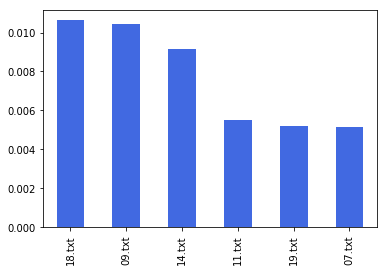

In [83]:
# do search, results sorted by occurrence

results = frequency_matrix.loc["olive"].sort_values(ascending=False)
results = results[results>0]
results.plot(kind="bar", color='royalblue')

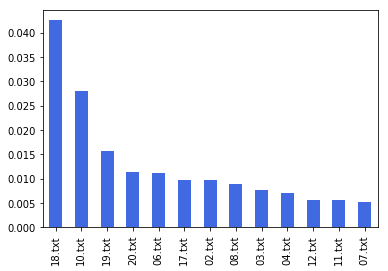

In [84]:
# do search, results sorted by occurrence

results = frequency_matrix.loc["butter"].sort_values(ascending=False)
results = results[results>0]
results.plot(kind="bar", color='royalblue')